<a href="https://colab.research.google.com/github/nunezyamila698/Proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*texto en cursiva*

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro de dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Biología', 'Física', 'Química', 'Educación Física', 'Inglés', 'Ciudadanía', 'Arte', 'Música']

# Lista de apellidos comunes
apellidos = ['Gómez', 'Rodríguez', 'Pérez', 'García', 'López', 'Martínez', 'González', 'Díaz', 'Sánchez', 'Romero']

# Lista de nombres comunes
nombres = ['Juan', 'María', 'Pedro', 'Ana', 'Luis', 'Laura', 'Carlos', 'Sofía', 'Miguel', 'Isabel']


# Función para generar datos aleatorios
def generar_datos(num_filas):
    data = []
    for _ in range(num_filas):
      apellido = random.choice(apellidos)
      nombre = random.choice(nombres)
      dni = random.randint(10000000, 99999999)  # DNI aleatorio
      materia = random.choice(materias)
      nota1 = random.randint(1, 10)  # Nota primer trimestre
      nota2 = random.randint(1, 10)  # Nota segundo trimestre
      nota3 = random.randint(1, 10)  # Nota tercer trimestre
      faltas = random.randint(0, 20)  # Faltas a clases
      data.append([apellido, nombre, dni, materia, nota1, nota2, nota3, faltas])
    return data

# Crear el DataFrame
num_filas = 100
datos = generar_datos(num_filas)
df = pd.DataFrame(datos, columns=['Apellido', 'Nombre', 'DNI', 'Materia', '1er Trimestre', '2do Trimestre', '3er Trimestre', 'Faltas'])

# Mostrar el DataFrame
df

,Apellido,Nombre,DNI,Materia,1er Trimestre,2do Trimestre,3er Trimestre,Faltas
0,Rodríguez,Miguel,95037595,Ciencias Naturales,6,6,7,0
1,Martínez,Luis,38297879,Lengua y Literatura,5,10,5,9
2,González,Juan,61219005,Geografía,4,9,5,13
3,Pérez,Laura,72306965,Historia,5,2,9,20
4,González,Laura,44986732,Geografía,6,9,6,12
...,...,...,...,...,...,...,...,...
95,Rodríguez,Luis,76817101,Arte,10,7,5,18
96,García,Pedro,35445382,Biología,10,5,8,4
97,López,Luis,82234968,Ciencias Naturales,7,3,3,0
98,Rodríguez,Sofía,93831992,Educación Física,3,6,8,3


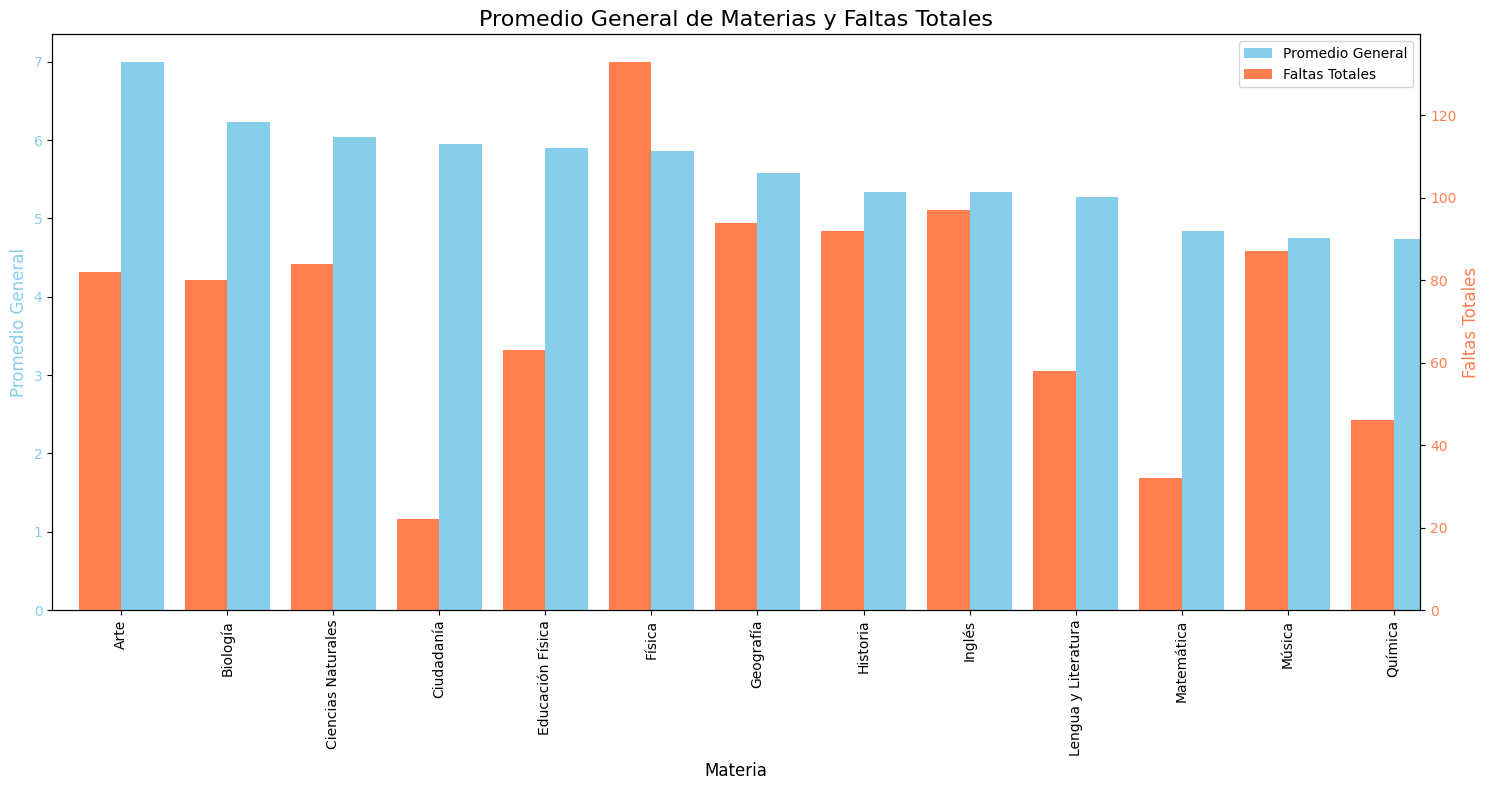

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# ... (Your existing code to generate the DataFrame 'df')

# Calculate the average grade for each subject
average_grades = df.groupby('Materia').agg({'1er Trimestre': 'mean', '2do Trimestre': 'mean', '3er Trimestre': 'mean'})
average_grades['Promedio General'] = average_grades.mean(axis=1)
average_grades = average_grades.sort_values(by='Promedio General', ascending=False)

# Calculate the total absences for each subject
total_absences = df.groupby('Materia')['Faltas'].sum()


# Create the bar chart
fig, ax1 = plt.subplots(figsize=(15, 8))

# Bar plot for average grades
average_grades['Promedio General'].plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4, label='Promedio General')
ax1.set_xlabel('Materia', fontsize=12)
ax1.set_ylabel('Promedio General', color='skyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General de Materias y Faltas Totales', fontsize=16)

# Create a second y-axis for absences
ax2 = ax1.twinx()
total_absences.plot(kind='bar', ax=ax2, color='coral', position=1, width=0.4, label='Faltas Totales')
ax2.set_ylabel('Faltas Totales', color='coral', fontsize=12)
ax2.tick_params(axis='y', labelcolor='coral')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')


# Improve readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [4]:
df.to_csv("datos_alumnos.csv", index=False)